In [ ]:
# please upload the zip file of faces before running
!unzip faces.zip

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import  numpy.linalg as la
import cv2
import os
from google.colab.patches import cv2_imshow

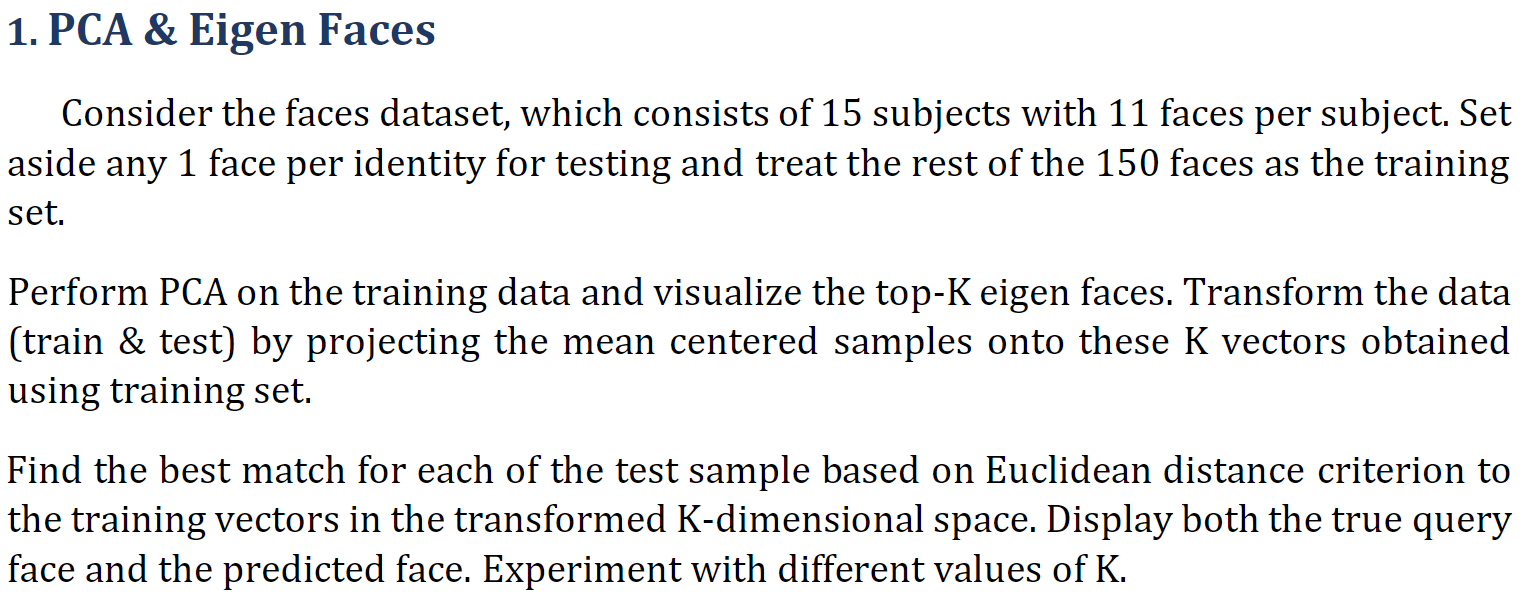

In [153]:
def load_images_from_folder(folder):
    images = []
    data = []
    count = 1
    list_images = sorted(os.listdir(folder))
    for filename in list_images:
        img = cv2.imread(os.path.join(folder,filename))
        images.append(img)

        scale_percent = 40
        #calculate the 50 percent of original dimensions
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)

        # dsize
        dsize = (width, height)

        # resize image
        img = cv2.resize(img, dsize)
        data.append(img.reshape(-1))
        #cv2_imshow(img)
        #print(filename)
        count+=1
    images = np.array(images)   
    data = np.array(data)     
    return images,data

In [154]:
def PCA(data,k):
    mean = np.mean(data,axis=0)
    y = data - mean
    print(y.shape)
    y = y.T
    co_var = np.cov(y@y.T)
    eig_values,eig_vectors = la.eigh(co_var)
    sum_ = np.sum(eig_values)
    sort_eig_value_index = np.argsort(eig_values)[::-1][:k]
    eig_values = eig_values[sort_eig_value_index]
    eig_vectors = eig_vectors[sort_eig_value_index]
    print(eig_values)
    #print(eig_vectors)
    print(np.sum(eig_values)/sum_)
    print(eig_vectors.shape)
    return mean,eig_vectors

In [155]:
def train_test_split():
    test_index = []
    for i in range(15):
        index = np.random.randint(low = 0,high = 11,size = 1)
        test_index.append(index[0]+i*11)
    test_index = np.array(test_index)   
    train_index = np.setdiff1d(np.arange(0,165),test_index)
    return train_index,test_index

In [156]:
def transform_data(mean,Q,data):
    transform_data = Q@(data-mean).T
    transform_data = transform_data.T
    return transform_data

In [157]:
def predict_similarity(images,train_index,test_index,transform_train_data,transform_test_data):
    similar = []
    for j in range(15):
        test = transform_test_data[j]
        best_match = 0
        index = -1
        for i in range(len(transform_train_data)):
            similarity = np.dot(test,transform_train_data[i])/(np.sqrt(np.sum(np.square(test)))*np.sqrt(np.sum(np.square(transform_train_data[i]))))
            if similarity > best_match:
                best_match = similarity
                index = i
        similar.append(best_match)        
        print("Test Image")       
        cv2_imshow(images[test_index[j]])
        print("Predicted Image") 
        cv2_imshow(images[train_index[index]])
        print(test_index[j],train_index[index])
        print("Similarity : ",best_match)
        print("\n\n")

In [158]:
def predict_distance(images,train_index,test_index,transform_train_data,transform_test_data):
    distance = []
    #print(np.sqrt(np.sum(np.square(transform_train_data[0]))))
    for i in range(len(transform_test_data)):
        best_match = 10**9
        index = -1
        for j in range(len(transform_train_data)):
            distance_ = np.sqrt(np.sum(np.square(transform_train_data[j]-transform_test_data[i])))
            if best_match > distance_:
                best_match = distance_
                index = j
        distance.append(best_match)     
        print("Test Image")       
        cv2_imshow(images[test_index[i]])
        print("Predicted Image") 
        cv2_imshow(images[train_index[index]])
        print(test_index[i],train_index[index])
        print("Distance : ",best_match)
        print("\n\n")   
    #distance_train_data = np.array(distance_train_data)    
    #print(distance_train_data)   

    # distance_test_data = []
    # for i in range(len(transform_test_data)):
    #     distance_test_data.append(np.sqrt(np.sum(np.square(transform_test_data[i]))))
    # distance_test_data = np.array(distance_test_data)    
    # #print(distance_test_data)   

    # distance = []
    # for i in range(len(transform_test_data)):
    #     test = distance_test_data[i]
    #     best_match = 10**19
    #     index = -1
    #     for j in range(len(transform_train_data)):
    #         if best_match > abs(test - distance_train_data[j]):
    #             best_match = abs(test - distance_train_data[j])
    #             index = j
    #     distance.append(best_match)        
        # print("Test Image")       
        # cv2_imshow(images[test_index[i]])
        # print("Predicted Image") 
        # cv2_imshow(images[train_index[index]])
        # print(test_index[i],train_index[index])
        # print("Distance : ",best_match)
        # print("\n\n")

In [159]:
images,data = load_images_from_folder('faces')
train_index,test_index = train_test_split()
print("Train data index : ",train_index,"\n")
print("Test data index : ",test_index,"\n")
test_data = data[test_index] 
train_data = data[train_index]

Train data index :  [  0   1   2   3   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  27  29  30  31  32  34  35  36  37  38  39
  40  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  76  77  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  95  96  97  98
  99 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 119 120 121 122 123 124 125 127 128 129 130 131 132 133 134 135 136 137
 138 139 141 142 143 144 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 162 163 164] 

Test data index :  [  4  14  28  33  47  57  75  78  94 100 118 126 140 145 161] 



In [160]:
k = 1500
mean,eig_vectors = PCA(train_data,k)
print(eig_vectors.shape)

(150, 10200)
[3.91081451e+13 2.03930823e+13 6.83258979e+12 ... 9.92919762e-05
 9.92797571e-05 9.92774561e-05]
1.0000000000000095
(1500, 10200)
(1500, 10200)


In [161]:
transform_train_data = transform_data(mean,eig_vectors,train_data)
print(transform_train_data.shape)
transform_test_data = transform_data(mean,eig_vectors,test_data)
print(transform_test_data.shape)

(150, 1500)
(15, 1500)


Test Image


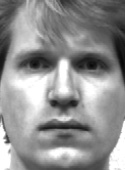

Predicted Image


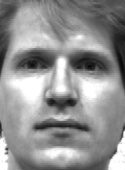

4 5
Similarity :  0.9187218088891738



Test Image


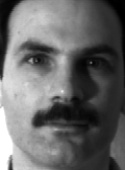

Predicted Image


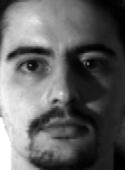

14 91
Similarity :  0.7933968238531637



Test Image


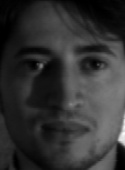

Predicted Image


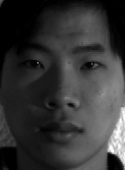

28 39
Similarity :  0.8935623449464033



Test Image


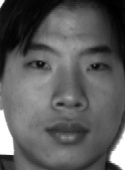

Predicted Image


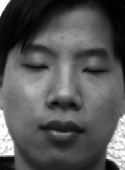

33 41
Similarity :  0.6987258014418696



Test Image


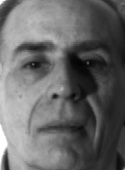

Predicted Image


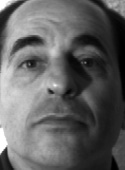

47 124
Similarity :  0.8303955647755361



Test Image


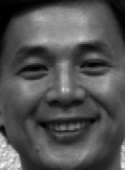

Predicted Image


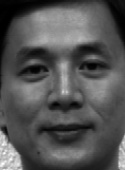

57 59
Similarity :  0.799213899211596



Test Image


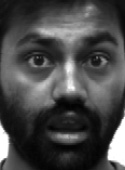

Predicted Image


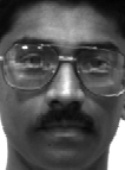

75 137
Similarity :  0.5972770047060653



Test Image


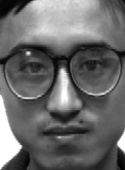

Predicted Image


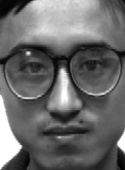

78 82
Similarity :  0.9999999999999997



Test Image


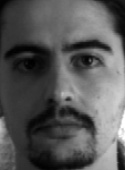

Predicted Image


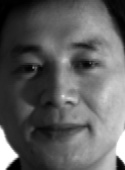

94 61
Similarity :  0.7786978500722865



Test Image


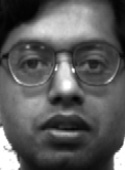

Predicted Image


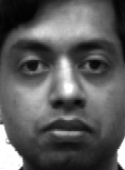

100 103
Similarity :  0.7202455990595488



Test Image


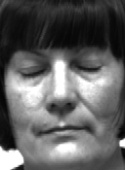

Predicted Image


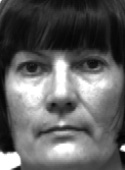

118 115
Similarity :  0.9513932426553926



Test Image


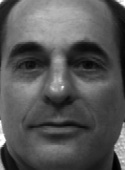

Predicted Image


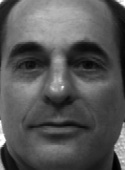

126 125
Similarity :  0.9999999999999993



Test Image


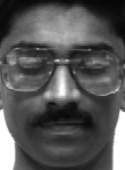

Predicted Image


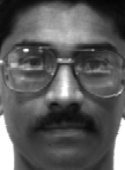

140 133
Similarity :  0.7623875339890935



Test Image


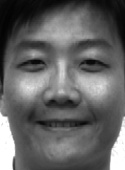

Predicted Image


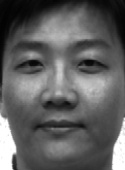

145 147
Similarity :  0.8990681659101156



Test Image


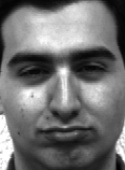

Predicted Image


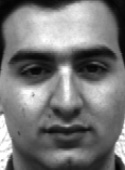

161 159
Similarity :  0.9232205285592038





In [162]:
predict_similarity(images,train_index,test_index,transform_train_data,transform_test_data)

Test Image


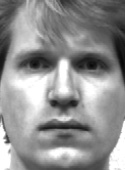

Predicted Image


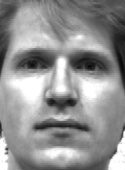

4 5
Distance :  1049.1081483718365



Test Image


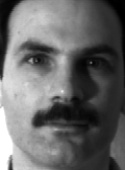

Predicted Image


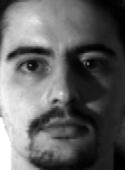

14 91
Distance :  1515.1660340919564



Test Image


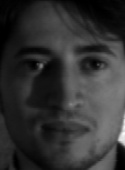

Predicted Image


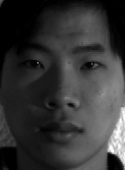

28 39
Distance :  1168.534894126744



Test Image


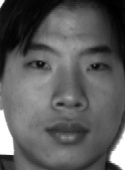

Predicted Image


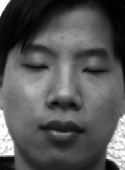

33 41
Distance :  1284.1254782237245



Test Image


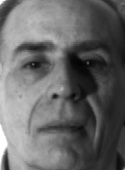

Predicted Image


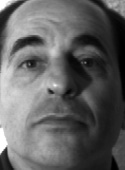

47 124
Distance :  1244.3925460727562



Test Image


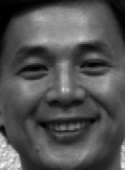

Predicted Image


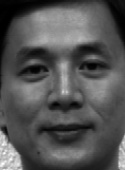

57 59
Distance :  755.4122634384291



Test Image


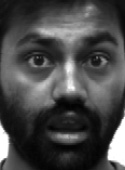

Predicted Image


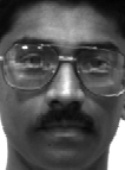

75 137
Distance :  1577.7855664828971



Test Image


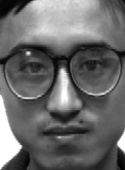

Predicted Image


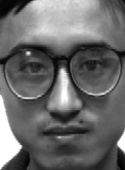

78 82
Distance :  1.022910115643183e-13



Test Image


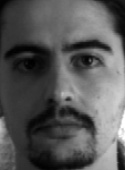

Predicted Image


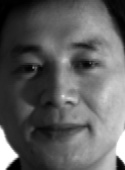

94 61
Distance :  1462.284134649814



Test Image


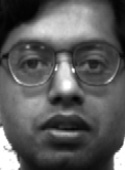

Predicted Image


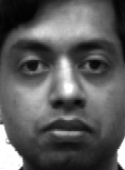

100 103
Distance :  1096.1020430457058



Test Image


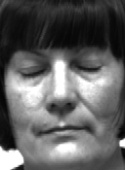

Predicted Image


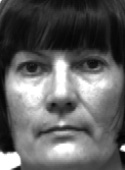

118 115
Distance :  848.6603660413828



Test Image


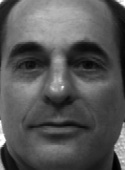

Predicted Image


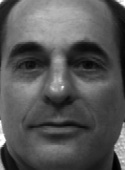

126 125
Distance :  0.0



Test Image


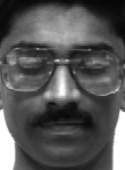

Predicted Image


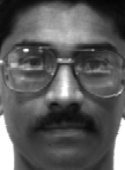

140 133
Distance :  948.0553631872417



Test Image


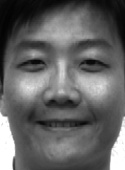

Predicted Image


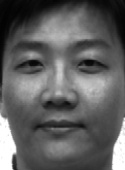

145 147
Distance :  653.4418341105976



Test Image


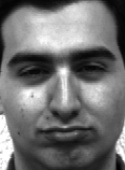

Predicted Image


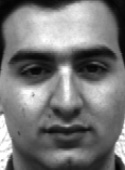

161 159
Distance :  763.2509817962258





In [163]:
predict_distance(images,train_index,test_index,transform_train_data,transform_test_data)

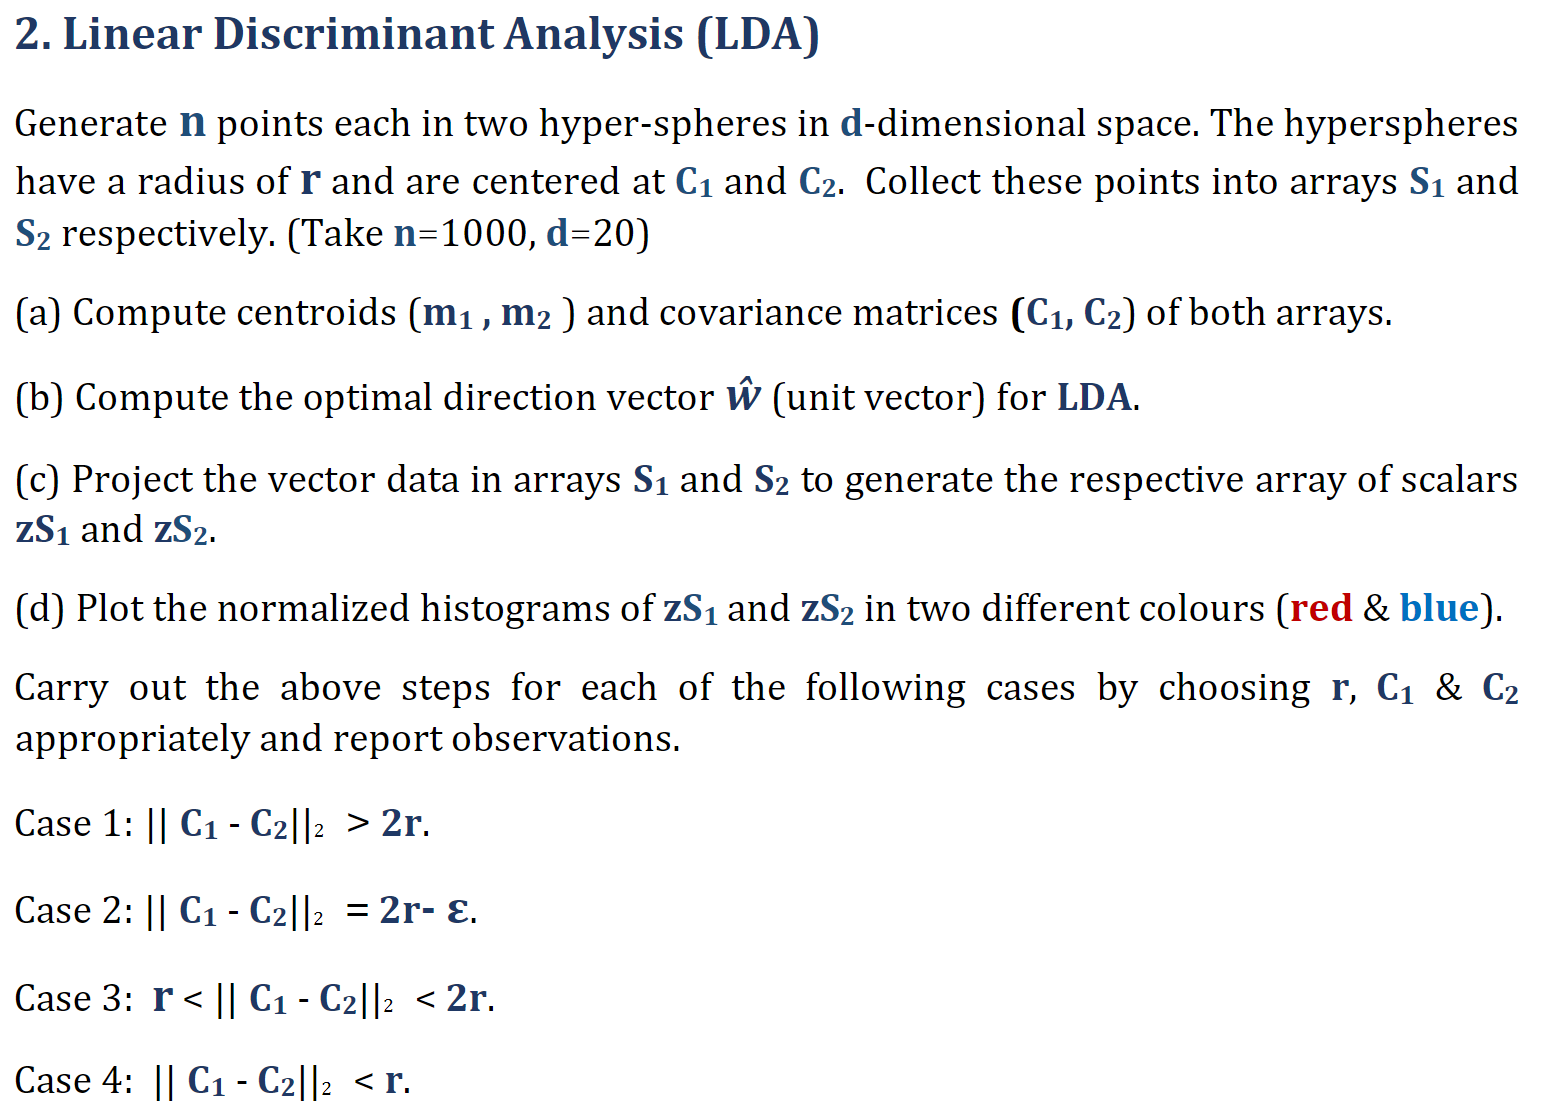

In [164]:
def hyperSphere(num,dim,radius,center):
    sd = np.random.uniform(low = -1,high = 1,size = (num,dim))
    len_ = np.sqrt(np.sum(np.square(sd),axis = 1))
    dim_len = len_
    for i in range(dim-1):
        dim_len = np.column_stack((dim_len,len_))
    #print(dim_len.shape)    
    normalized_sd = sd/dim_len
    Lambda = np.random.randint(low = 0,high = radius+1,size = 1)
    return center+(normalized_sd*Lambda)

In [165]:
def compute_Centroid_CoVarMat(hyperSphere):
    centroid = np.mean(hyperSphere,axis=0)
    Co_var_Matrix = np.cov(hyperSphere.T@hyperSphere)
    return centroid,Co_var_Matrix

In [166]:
def LDA(mean1,mean2,coVar1,coVar2):
    W = (coVar1+coVar2)@(mean1 - mean2).T
    return W/np.sqrt(np.sum(np.square(W)))

## For || C1 - C2 || > 2*Radius

In [167]:
num = 1000
dim = 10
radius = 10
print("Radius : ",radius)
center1 = np.random.randint(low = 1,high = 20,size = dim)
center2 = np.random.randint(low = 1,high = 20,size = dim)
distance = np.sqrt(np.sum(np.square(center1 - center2)))
while distance <= 2*radius:
    center1 = np.random.randint(low = 1,high = 20,size = dim)
    center2 = np.random.randint(low = 1,high = 20,size = dim)
    distance = np.sqrt(np.sum(np.square(center1 - center2)))
print("Distance between two centers : ",distance)      

Radius :  10
Distance between two centers :  26.229754097208


(1000,)
(1000,)


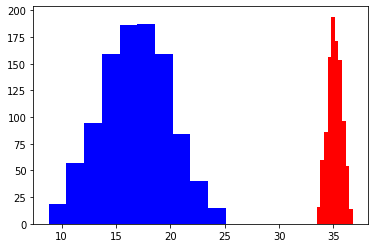

In [168]:
Hyper_Sphere1 = hyperSphere(num,dim,radius,center1)
#print(Hyper_Sphere1.shape)
Hyper_Sphere2 = hyperSphere(num,dim,radius,center2)
#print(Hyper_Sphere2.shape)
mean1,coVar1 = compute_Centroid_CoVarMat(Hyper_Sphere1)
mean2,coVar2 = compute_Centroid_CoVarMat(Hyper_Sphere2)
W_ = LDA(mean1,mean2,coVar1,coVar2)
projected_points1 = Hyper_Sphere1@W_.T
print(projected_points1.shape)
projected_points2 = Hyper_Sphere2@W_.T
print(projected_points2.shape)
plt.hist(projected_points1,color = 'red')
plt.hist(projected_points2,color = 'blue')
plt.show()

## For || C1 - C2 || = 2*Radius - epsilon

In [169]:
epsilon = 5
num = 1000
dim = 10
radius = 10
print("Radius : ",radius)
center1 = np.random.randint(low = 1,high = 20,size = dim)
center2 = np.random.randint(low = 1,high = 20,size = dim)
distance = np.sqrt(np.sum(np.square(center1 - center2)))
while distance != (2*radius - epsilon):
    center1 = np.random.randint(low = 1,high = 20,size = dim)
    center2 = np.random.randint(low = 1,high = 20,size = dim)
    distance = np.sqrt(np.sum(np.square(center1 - center2)))
print("Distance between two centers : ",distance)    

Radius :  10
Distance between two centers :  15.0


(1000,)
(1000,)


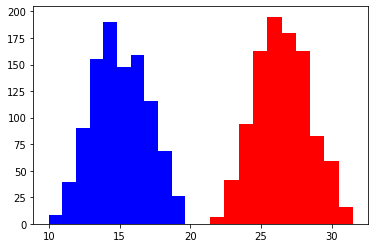

In [170]:
Hyper_Sphere1 = hyperSphere(num,dim,radius,center1)
#print(Hyper_Sphere1.shape)
Hyper_Sphere2 = hyperSphere(num,dim,radius,center2)
#print(Hyper_Sphere2.shape)
mean1,coVar1 = compute_Centroid_CoVarMat(Hyper_Sphere1)
mean2,coVar2 = compute_Centroid_CoVarMat(Hyper_Sphere2)
W_ = LDA(mean1,mean2,coVar1,coVar2)
projected_points1 = Hyper_Sphere1@W_.T
print(projected_points1.shape)
projected_points2 = Hyper_Sphere2@W_.T
print(projected_points2.shape)
plt.hist(projected_points1,color = 'red')
plt.hist(projected_points2,color = 'blue')
plt.show()

## For Radius < || C1 - C2 || < 2*Radius

In [185]:
num = 1000
dim = 10
radius = 10
print("Radius : ",radius)
center1 = np.random.randint(low = 1,high = 20,size = dim)
center2 = np.random.randint(low = 1,high = 20,size = dim)
distance = np.sqrt(np.sum(np.square(center1 - center2)))
while distance <= radius or distance >= 2*radius:
    center1 = np.random.randint(low = 1,high = 20,size = dim)
    center2 = np.random.randint(low = 1,high = 20,size = dim)
    distance = np.sqrt(np.sum(np.square(center1 - center2)))
print("Distance between two centers : ",distance)    

Radius :  10
Distance between two centers :  14.0


(1000,)
(1000,)


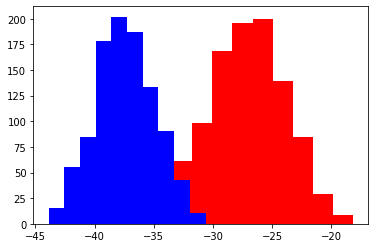

In [186]:
Hyper_Sphere1 = hyperSphere(num,dim,radius,center1)
#print(Hyper_Sphere1.shape)
Hyper_Sphere2 = hyperSphere(num,dim,radius,center2)
#print(Hyper_Sphere2.shape)
mean1,coVar1 = compute_Centroid_CoVarMat(Hyper_Sphere1)
mean2,coVar2 = compute_Centroid_CoVarMat(Hyper_Sphere2)
W_ = LDA(mean1,mean2,coVar1,coVar2)
projected_points1 = Hyper_Sphere1@W_.T
print(projected_points1.shape)
projected_points2 = Hyper_Sphere2@W_.T
print(projected_points2.shape)
plt.hist(projected_points1,color = 'red')
plt.hist(projected_points2,color = 'blue')
plt.show()

## For || C1 - C2 || < Radius

In [189]:
num = 1000
dim = 10
radius = 10
print("Radius : ",radius)
center1 = np.random.randint(low = 1,high = 20,size = dim)
center2 = np.random.randint(low = 1,high = 20,size = dim)
distance = np.sqrt(np.sum(np.square(center1 - center2)))
while distance >= radius:
    center1 = np.random.randint(low = 1,high = 20,size = dim)
    center2 = np.random.randint(low = 1,high = 20,size = dim)
    distance = np.sqrt(np.sum(np.square(center1 - center2)))
print("Distance between two centers : ",distance)    

Radius :  10
Distance between two centers :  8.831760866327848


(1000,)
(1000,)


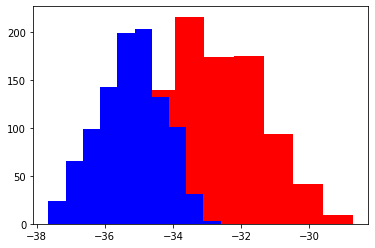

In [190]:
Hyper_Sphere1 = hyperSphere(num,dim,radius,center1)
#print(Hyper_Sphere1.shape)
Hyper_Sphere2 = hyperSphere(num,dim,radius,center2)
#print(Hyper_Sphere2.shape)
mean1,coVar1 = compute_Centroid_CoVarMat(Hyper_Sphere1)
mean2,coVar2 = compute_Centroid_CoVarMat(Hyper_Sphere2)
W_ = LDA(mean1,mean2,coVar1,coVar2)
projected_points1 = Hyper_Sphere1@W_.T
print(projected_points1.shape)
projected_points2 = Hyper_Sphere2@W_.T
print(projected_points2.shape)
plt.hist(projected_points1,color = 'red')
plt.hist(projected_points2,color = 'blue')
plt.show()